<h1>Deep Learning
Assignment 1 - Fashion MNIST Dataset
<h3>Ilias Giannakos - p3352007<br>
Elena Adamidi - XXXX

<h5> Import Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

Set Seed for reproducibility

In [2]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(42)
set_seed(42)

<h5> Load Fashion MNIST dataset and check it has been loaded correctly

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#check that fashion mnist has been loaded correctly
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

<h5> Check the distribution of each label

In [4]:
print(np.bincount(y_train))
print(np.bincount(y_test))
#train & test dataset is balanced (same number of occurencies between different clothes)

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


<h5> Map labels to their original description

In [5]:
label_description = {0: "T-shirt",1: "Trouser",
2: "Pullover", 3: "Dress", 
4: "Coat", 5:"Sandal",6:"Shirt",
7:"Sneaker",8:"Bag",9:"Ankle Boot"}

print("Total fashion mnist categories are",len(label_description))

Total fashion mnist categories are 10


<h5> Preprocessing

In [6]:
#make y values categorical
y_train = tf.keras.utils.to_categorical(y_train, len(label_description))
y_test = tf.keras.utils.to_categorical(y_test, len(label_description))

#normalize pixels
x_train = (x_train.astype("float32") / 255)
x_test = (x_test.astype("float32") / 255)

#flatten the train data
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

Map the one-hot-encoded y values back to human-readable descriptions

In [7]:
print("Y train vector of index 0 is:",y_train[0])
print("Y train of index 0 original value is:",y_train.argmax())

Y train vector of index 0 is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Y train of index 0 original value is: 9


Visualize the data

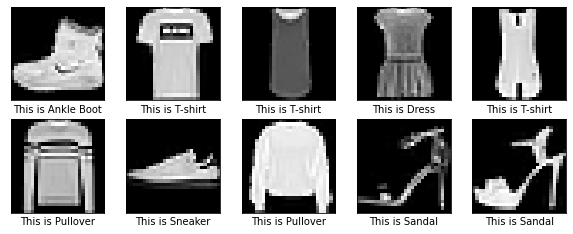

In [8]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pixels = x_train[i].reshape((28,28))
    label = y_train[i].argmax() #with argmax we can get back the original value
    
    #plt.title('Label is {}'.format(label_description.get(label)))
    plt.imshow(pixels, cmap='gray')
    plt.xlabel("This is {}".format(label_description.get(label)))

plt.show()


<h4>First model attempt (MLP)

In [9]:
def create_model_mlp(num_hidden_layers: int, num_of_neurons: int, activation_hidden:str = "relu", optimizer = None, epochs:int = 100, dropout:int = None):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=784, name="Input layer"))
    for layer in range(num_hidden_layers-1):
        model.add(tf.keras.layers.Dense(num_of_neurons, activation=activation_hidden))
        if dropout:
            model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(int(num_of_neurons/2), activation=activation_hidden))
    model.add(tf.keras.layers.Dense(len(label_description), activation="softmax"))
    opt = optimizer
    model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model
    



Default Values:

In [10]:
epochs = 70
batch_size = 64
callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
    min_delta=0,
    patience=6,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

In [11]:
#baseline model, 2 hidden layers, 128 & 64 neurons each layers & SGD optimizer
model = create_model_mlp(num_hidden_layers =2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.SGD())

In [12]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_test, y_test)
)

Epoch 1/70
938/938 [==============================] - 3s 2ms/step - loss: 0.9030 - accuracy: 0.7149 - val_loss: 0.6604 - val_accuracy: 0.7565
Epoch 2/70
938/938 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.8119 - val_loss: 0.5470 - val_accuracy: 0.8067
Epoch 3/70
938/938 [==============================] - 2s 2ms/step - loss: 0.4897 - accuracy: 0.8291 - val_loss: 0.4992 - val_accuracy: 0.8218
Epoch 4/70
938/938 [==============================] - 2s 2ms/step - loss: 0.4596 - accuracy: 0.8396 - val_loss: 0.4764 - val_accuracy: 0.8309
Epoch 5/70
938/938 [==============================] - 2s 2ms/step - loss: 0.4396 - accuracy: 0.8438 - val_loss: 0.4984 - val_accuracy: 0.8197
Epoch 6/70
938/938 [==============================] - 2s 2ms/step - loss: 0.4235 - accuracy: 0.8499 - val_loss: 0.4653 - val_accuracy: 0.8378
Epoch 7/70
938/938 [==============================] - 2s 2ms/step - loss: 0.4113 - accuracy: 0.8565 - val_loss: 0.4705 - val_accuracy: 0.8316
Epoch 

In [13]:
print(history.history.get("val_accuracy")[-7])

0.8845999836921692


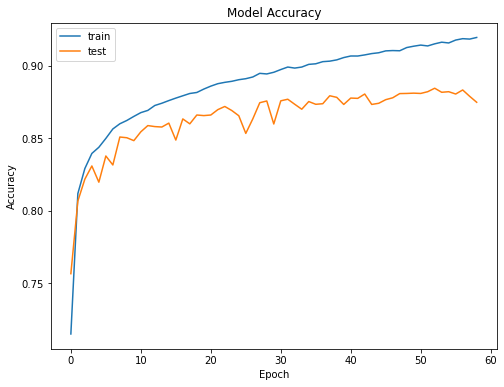

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
#baseline model, 2 hidden layers, 128 & 64 neurons each layers & Adam optimizer
model2 = create_model_mlp(num_hidden_layers = 2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam())
history2 = model2.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_test, y_test)
)

print("Test accuracy is ",model2.evaluate(x_test,y_test)[1])


As we observe, Adam optimizer achieves better performance (0.89 val accuracy) while taking much less epochs to converge.

In [17]:
#We now try with 5 hidden layers, 128x4 each layer + 64 neurons on last & Adam optimizer
model3 = create_model_mlp(num_hidden_layers = 5 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam())
history = model3.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_test, y_test)
)

Epoch 1/70
938/938 [==============================] - 3s 3ms/step - loss: 0.5228 - accuracy: 0.8124 - val_loss: 0.4545 - val_accuracy: 0.8320
Epoch 2/70
938/938 [==============================] - 2s 3ms/step - loss: 0.3761 - accuracy: 0.8613 - val_loss: 0.4423 - val_accuracy: 0.8430
Epoch 3/70
938/938 [==============================] - 2s 3ms/step - loss: 0.3418 - accuracy: 0.8745 - val_loss: 0.3754 - val_accuracy: 0.8673
Epoch 4/70
938/938 [==============================] - 2s 3ms/step - loss: 0.3157 - accuracy: 0.8832 - val_loss: 0.3535 - val_accuracy: 0.8745
Epoch 5/70
938/938 [==============================] - 3s 3ms/step - loss: 0.3015 - accuracy: 0.8870 - val_loss: 0.3414 - val_accuracy: 0.8769
Epoch 6/70
938/938 [==============================] - 2s 3ms/step - loss: 0.2859 - accuracy: 0.8931 - val_loss: 0.3810 - val_accuracy: 0.8619
Epoch 7/70
938/938 [==============================] - 2s 2ms/step - loss: 0.2754 - accuracy: 0.8970 - val_loss: 0.3531 - val_accuracy: 0.8750
Epoch 

In [28]:
_, val_accuracy = model3.evaluate(x_test,y_test)
print(val_accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8914
0.8913999795913696


In [40]:
print("the model with 3 extra layers has less val accuracy than the previous with 2 hidden ({}), therefore we discard it".format(model2.evaluate(x_test,y_test, verbose=0)[1]))

the model with 3 extra layers has less val accuracy than the previous with 2 hidden (0.891700029373169), therefore we discard it


In [41]:
predictions = model2.predict(x_test)
print("probability distribution of each class", predictions[0]) 
print("Model predicts this is",label_description.get(np.argmax(predictions[0])), "and the true label is", label_description.get(np.argmax(y_test[0])))

probability distribution of each class [2.9640861e-09 1.0522056e-08 6.0551407e-08 1.8629486e-08 2.1946784e-09
 1.3962332e-06 1.7591779e-08 3.7082478e-03 2.9150449e-09 9.9629021e-01]
Model predicts this is Ankle Boot and the true label is Ankle Boot


In [43]:
#model with 2 hidden layers (same as model2) but now with dropout
model4 = create_model_mlp(num_hidden_layers = 2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam(), dropout=0.1)
history4 = model4.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_test, y_test)
)

print("Test accuracy is ",model4.evaluate(x_test,y_test)[1])
print("This is a tiny improvement over model2, but as dropout regularizes the model we will keep this as our baseline model")

Epoch 1/70
938/938 [==============================] - 3s 3ms/step - loss: 0.5313 - accuracy: 0.8105 - val_loss: 0.4346 - val_accuracy: 0.8401
Epoch 2/70
938/938 [==============================] - 2s 2ms/step - loss: 0.3880 - accuracy: 0.8588 - val_loss: 0.4078 - val_accuracy: 0.8527
Epoch 3/70
938/938 [==============================] - 2s 2ms/step - loss: 0.3547 - accuracy: 0.8706 - val_loss: 0.3705 - val_accuracy: 0.8666
Epoch 4/70
938/938 [==============================] - 2s 2ms/step - loss: 0.3298 - accuracy: 0.8783 - val_loss: 0.3534 - val_accuracy: 0.8706
Epoch 5/70
938/938 [==============================] - 2s 2ms/step - loss: 0.3151 - accuracy: 0.8831 - val_loss: 0.3441 - val_accuracy: 0.8769
Epoch 6/70
938/938 [==============================] - 2s 2ms/step - loss: 0.3005 - accuracy: 0.8875 - val_loss: 0.3568 - val_accuracy: 0.8715
Epoch 7/70
938/938 [==============================] - 2s 2ms/step - loss: 0.2892 - accuracy: 0.8927 - val_loss: 0.3550 - val_accuracy: 0.8705
Epoch 

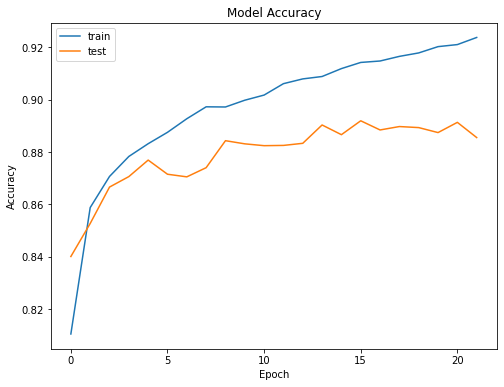

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# Reshape training and testing image
#we need to reshape your data is that Tensorflow expects a certain input shape for its Deep Learning Model, i.e., in this case, a Convolution Neural Network, specifically
#(<number of images>, <image x_dim>, <image y_dim>, <number of channels>)
train_X_cnn = x_train.reshape(-1, 28, 28, 1)
test_x_cnn = x_test.reshape(-1,28,28,1)

In [14]:
train_X_cnn.shape

(60000, 28, 28, 1)

<h4>CNN's

In [33]:
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', input_shape=(28,28,1)))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(64, activation='relu'))
model5.add(tf.keras.layers.Dense(10, activation = "softmax"))
model5.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [34]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [35]:
history5 = model5.fit(
    train_X_cnn, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (test_x_cnn, y_test)
)

Epoch 1/70
938/938 [==============================] - 26s 27ms/step - loss: 0.4903 - accuracy: 0.8229 - val_loss: 0.3915 - val_accuracy: 0.8611
Epoch 2/70
938/938 [==============================] - 26s 28ms/step - loss: 0.3208 - accuracy: 0.8839 - val_loss: 0.3608 - val_accuracy: 0.8688
Epoch 3/70
938/938 [==============================] - 25s 27ms/step - loss: 0.2777 - accuracy: 0.8982 - val_loss: 0.3185 - val_accuracy: 0.8841
Epoch 4/70
938/938 [==============================] - 25s 26ms/step - loss: 0.2459 - accuracy: 0.9099 - val_loss: 0.2846 - val_accuracy: 0.8980
Epoch 5/70
938/938 [==============================] - 26s 28ms/step - loss: 0.2233 - accuracy: 0.9171 - val_loss: 0.2677 - val_accuracy: 0.9054
Epoch 6/70
938/938 [==============================] - 26s 28ms/step - loss: 0.2001 - accuracy: 0.9253 - val_loss: 0.2748 - val_accuracy: 0.9011
Epoch 7/70
938/938 [==============================] - 24s 26ms/step - loss: 0.1836 - accuracy: 0.9321 - val_loss: 0.2800 - val_accuracy:

In [38]:
_, val_accuracy = model5.evaluate(test_x_cnn,y_test, verbose=0)
print(val_accuracy)

0.9110000133514404


In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

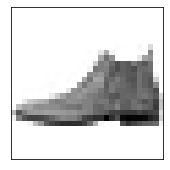

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()